In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Dataset

In [2]:
df=pd.read_csv('D:/uni stuff/Semester 8/DSCi/project/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,9046,51676,31112,60182,1665,56669,53882,10434,27419,60491
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female
age,67,61,80,49,79,81,74,69,59,78
hypertension,0,0,0,0,1,0,1,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57
bmi,36.6,NaN,32.5,34.4,24,29,27.4,22.8,NaN,24.2


In [4]:
df.shape

(5110, 12)

## Pre-Processing

In [5]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# Fill null values in bmi with mean value 
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [7]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
df.drop(['id'],axis=1,inplace=True)

In [11]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
gender,Male,Female,Male,Female,Female,Male,Male,Female,Female,Female
age,67,61,80,49,79,81,74,69,59,78
hypertension,0,0,0,0,1,0,1,0,0,0
heart_disease,1,0,1,0,0,0,1,0,0,0
ever_married,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed,Private,Private,Private,Private,Private
Residence_type,Urban,Rural,Rural,Urban,Rural,Urban,Rural,Urban,Rural,Urban
avg_glucose_level,228.69,202.21,105.92,171.23,174.12,186.21,70.09,94.39,76.15,58.57
bmi,36.6,28.8932,32.5,34.4,24,29,27.4,22.8,28.8932,24.2
smoking_status,formerly smoked,never smoked,never smoked,smokes,never smoked,formerly smoked,never smoked,never smoked,Unknown,Unknown


### Check all the columns have unique value

In [12]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [13]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [15]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [16]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [17]:
print(df['smoking_status'][df['smoking_status']=='Unknown'].count())

1544


In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Smoking_status has some invalid/missing values

In [19]:
df=df.replace('Unknown', np.nan)

In [20]:
df.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [21]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,28.893237,NaN,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.200000,NaN,1


In [22]:
df["gender"]= df["gender"].map({'Male': 0,'Female': 1})
df["ever_married"]= df["ever_married"].map({'Yes': 0,'No': 1})
df["work_type"]= df["work_type"].map({'Private': 0,'Self-employed': 1,'Govt_job': 2,'children': 3,'Never_worked': 4}) 
df["Residence_type"]= df["Residence_type"].map({'Urban': 0,'Rural': 1})

In [23]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0,1,0,0,0,228.69,36.600000,formerly smoked,1
1,1.0,61.0,0,0,0,1,1,202.21,28.893237,never smoked,1
2,0.0,80.0,0,1,0,0,1,105.92,32.500000,never smoked,1
3,1.0,49.0,0,0,0,0,0,171.23,34.400000,smokes,1
4,1.0,79.0,1,0,0,1,1,174.12,24.000000,never smoked,1


In [24]:
df["smoking_status"]= df["smoking_status"].map({'formerly smoked': 0,'never smoked': 1,'smokes': 2})

Use KNNImputer with 3 nearest neighbors to fill these values

In [25]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3)
df_filled=imputer.fit_transform(df)
df_filled

array([[ 0.        , 67.        ,  0.        , ..., 36.6       ,
         0.        ,  1.        ],
       [ 1.        , 61.        ,  0.        , ..., 28.89323691,
         1.        ,  1.        ],
       [ 0.        , 80.        ,  0.        , ..., 32.5       ,
         1.        ,  1.        ],
       ...,
       [ 1.        , 35.        ,  0.        , ..., 30.6       ,
         1.        ,  0.        ],
       [ 0.        , 51.        ,  0.        , ..., 25.6       ,
         0.        ,  0.        ],
       [ 1.        , 44.        ,  0.        , ..., 26.2       ,
         0.66666667,  0.        ]])

In [26]:
df = pd.DataFrame(df_filled,columns=df.columns)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0.0,1.0,0.0,0.0,0.0,228.69,36.600000,0.0,1.0
1,1.0,61.0,0.0,0.0,0.0,1.0,1.0,202.21,28.893237,1.0,1.0
2,0.0,80.0,0.0,1.0,0.0,0.0,1.0,105.92,32.500000,1.0,1.0
3,1.0,49.0,0.0,0.0,0.0,0.0,0.0,171.23,34.400000,2.0,1.0
4,1.0,79.0,1.0,0.0,0.0,1.0,1.0,174.12,24.000000,1.0,1.0


In [27]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0.0,1.0,0.0,0.0,0.0,228.69,36.600000,0.0,1.0
1,1.0,61.0,0.0,0.0,0.0,1.0,1.0,202.21,28.893237,1.0,1.0
2,0.0,80.0,0.0,1.0,0.0,0.0,1.0,105.92,32.500000,1.0,1.0
3,1.0,49.0,0.0,0.0,0.0,0.0,0.0,171.23,34.400000,2.0,1.0
4,1.0,79.0,1.0,0.0,0.0,1.0,1.0,174.12,24.000000,1.0,1.0
5,0.0,81.0,0.0,0.0,0.0,0.0,0.0,186.21,29.000000,0.0,1.0
6,0.0,74.0,1.0,1.0,0.0,0.0,1.0,70.09,27.400000,1.0,1.0
7,1.0,69.0,0.0,0.0,1.0,0.0,0.0,94.39,22.800000,1.0,1.0
8,1.0,59.0,0.0,0.0,0.0,0.0,1.0,76.15,28.893237,1.0,1.0
9,1.0,78.0,0.0,0.0,0.0,0.0,0.0,58.57,24.200000,1.0,1.0


In [28]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Data Visualization

In [29]:
# Create a copy of the dataframe for visualization
df_v = df.copy()
df_v["hypertension"]= df["hypertension"].map({1: "Yes",0: "No"})
df_v["stroke"]= df["stroke"].map({1: "Yes",0: "No"})
df_v["heart_disease"]= df["heart_disease"] .map({1: "Yes" ,0: "No"})
df_v["gender"]= df["gender"].map({0: 'Male',1: 'Female'})
df_v["ever_married"]= df["ever_married"].map({0 : 'Yes',1: 'No'})
df_v["work_type"]= df["work_type"].map({0: 'Private',1: 'Self-employed',2: 'Govt_job',3: 'children',4: 'Never_worked'}) 
df_v["Residence_type"]= df["Residence_type"].map({0: 'Urban',1: 'Rural'})
df_v["smoking_status"]= df["smoking_status"].map({0:'formerly smoked',1: 'never smoked',2: 'smokes'})

In [30]:
df_v.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.000000,formerly smoked,Yes
6,Male,74.0,Yes,Yes,Yes,Private,Rural,70.09,27.400000,never smoked,Yes
7,Female,69.0,No,No,No,Private,Urban,94.39,22.800000,never smoked,Yes
8,Female,59.0,No,No,Yes,Private,Rural,76.15,28.893237,never smoked,Yes
9,Female,78.0,No,No,Yes,Private,Urban,58.57,24.200000,never smoked,Yes


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

## Count plot for discrete features

In [32]:
def count_plot(feature):
    sns.countplot(x=feature,data=df_v)
    plt.show()


In [33]:
df_v.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

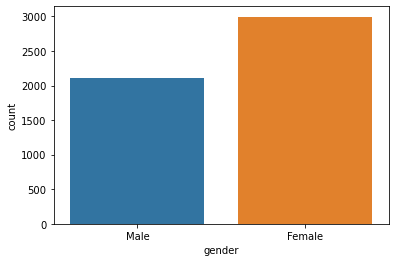

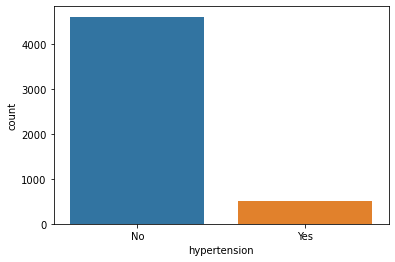

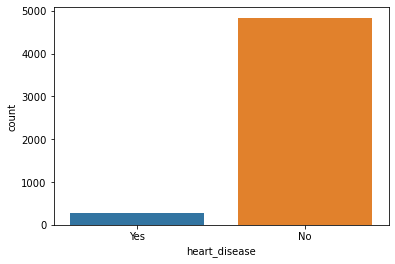

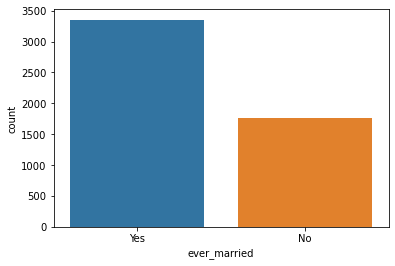

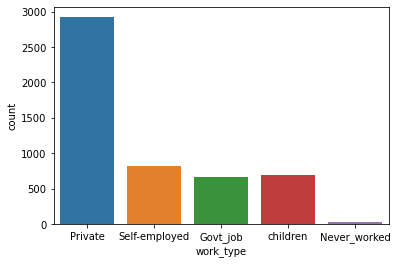

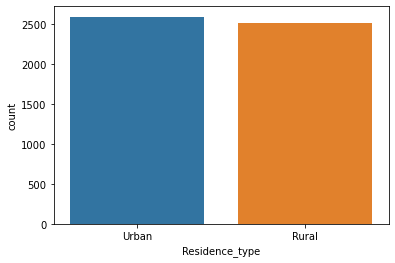

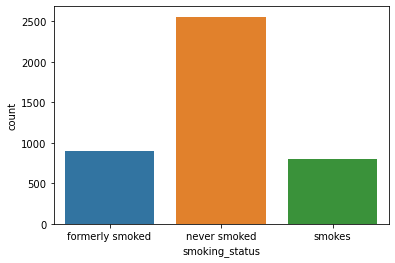

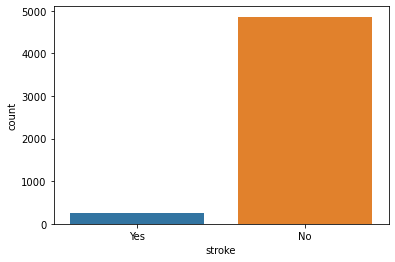

In [34]:
for cols in ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status', 'stroke']:
    count_plot(cols)

## Distplot for continuos features

In [35]:
def distplot(x):
    ax = sns.distplot(df_v[x], rug=True, rug_kws={"color": "g"},
                  kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "g"})
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


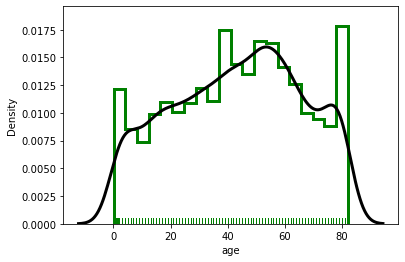

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


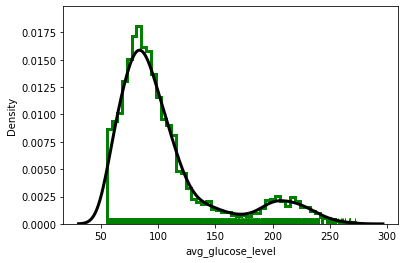

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


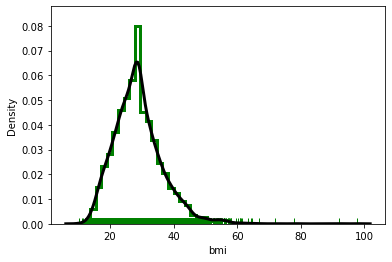

In [36]:
for cols in [ 'age', 'avg_glucose_level', 'bmi']:
    distplot(cols)

## Use count plot to find the number of smokers in each discrete feature

In [37]:
def count_plot_stroke(feature):
    sns.countplot(x=feature,data=df_v,hue='stroke')
    plt.show()

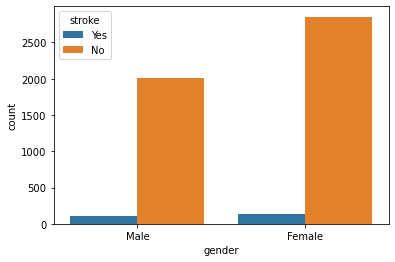

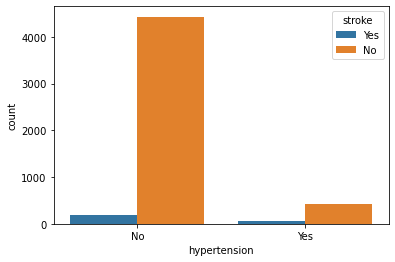

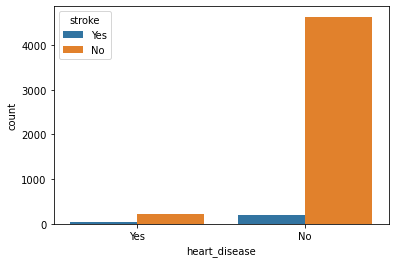

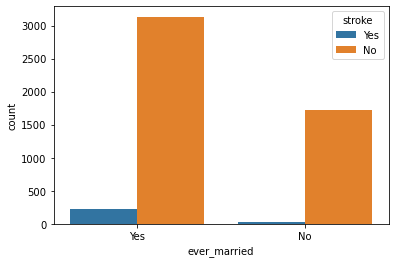

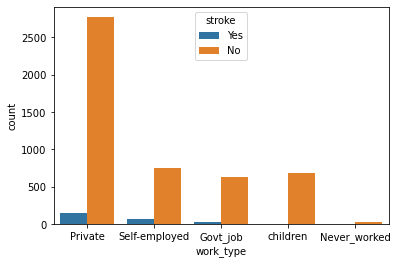

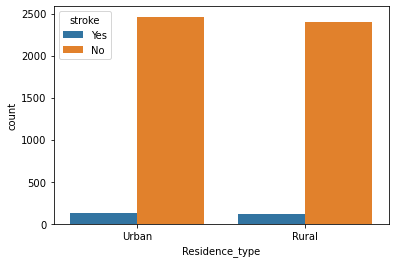

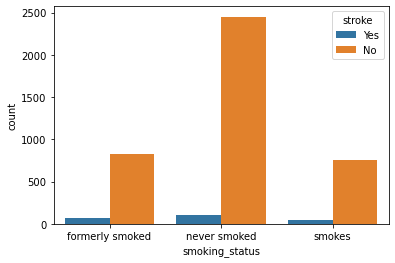

In [38]:
for cols in ['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status']:
    count_plot_stroke(cols)

## Use box and whisker plot to find the number of smokers in each continuos feature

In [39]:
def boxplot(feature):
    g = sns.catplot(x="stroke",y=feature,data=df_v,kind="box")
plt.show()


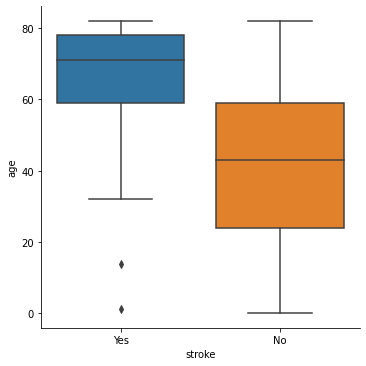

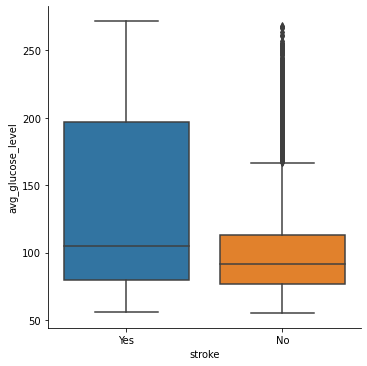

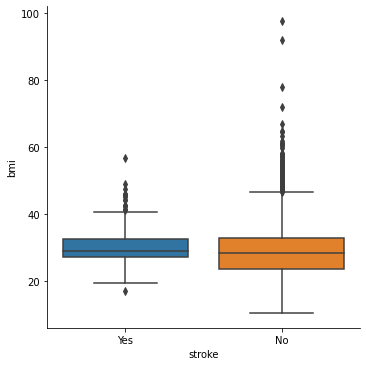

In [40]:
for cols in [ 'age', 'avg_glucose_level', 'bmi']:
    boxplot(cols)

## Assumptions that can be made from Data visualization

Being unmarried reduces your risk of a stroke

Being a smoker or a formerly smoker increases your risk of having a stroke

more than 25% of stroke cases They had hypertension

Female and male both have equal number of stroke cases while there is not any single case of stroke in other gender type.

Patient with private job have more number stroke cases then patient who are self employed or have a government job

Stroke has the highest correlation with age
As people start to age the risk of having a stroke is increasing most of stroke cases belong to 60-80 age group that means most of patients are in their older age.

Patients with stroke having higher avg_glucose_level

## Outlier Removal

In [41]:
df[df['bmi'] > 70]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
544,0.0,42.0,0.0,0.0,0.0,0.0,1.0,210.48,71.9,1.000000,0.0
928,1.0,23.0,1.0,0.0,1.0,0.0,0.0,70.03,78.0,2.000000,0.0
2128,0.0,17.0,1.0,0.0,1.0,0.0,1.0,61.67,97.6,1.333333,0.0
4209,0.0,38.0,1.0,0.0,0.0,0.0,1.0,56.90,92.0,1.000000,0.0


In [42]:
df.drop(df.index[df['bmi'] > 70], inplace=True)
df_v.drop(df_v.index[df_v['bmi'] > 70], inplace=True)
df_v.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,Yes


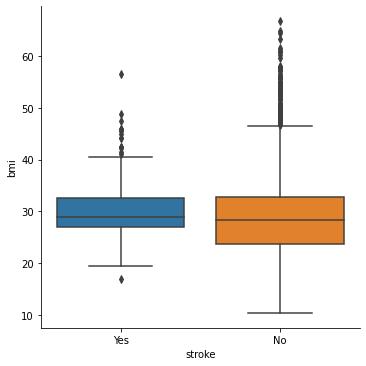

In [43]:
boxplot('bmi')

In [44]:
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = df_v['stroke'].value_counts().index,values = df_v['stroke'].value_counts(),hole = .5)])
fig.update_layout(title_text = 'Class Distribution')
fig.show()

ModuleNotFoundError: No module named 'plotly'

# Feature Selection

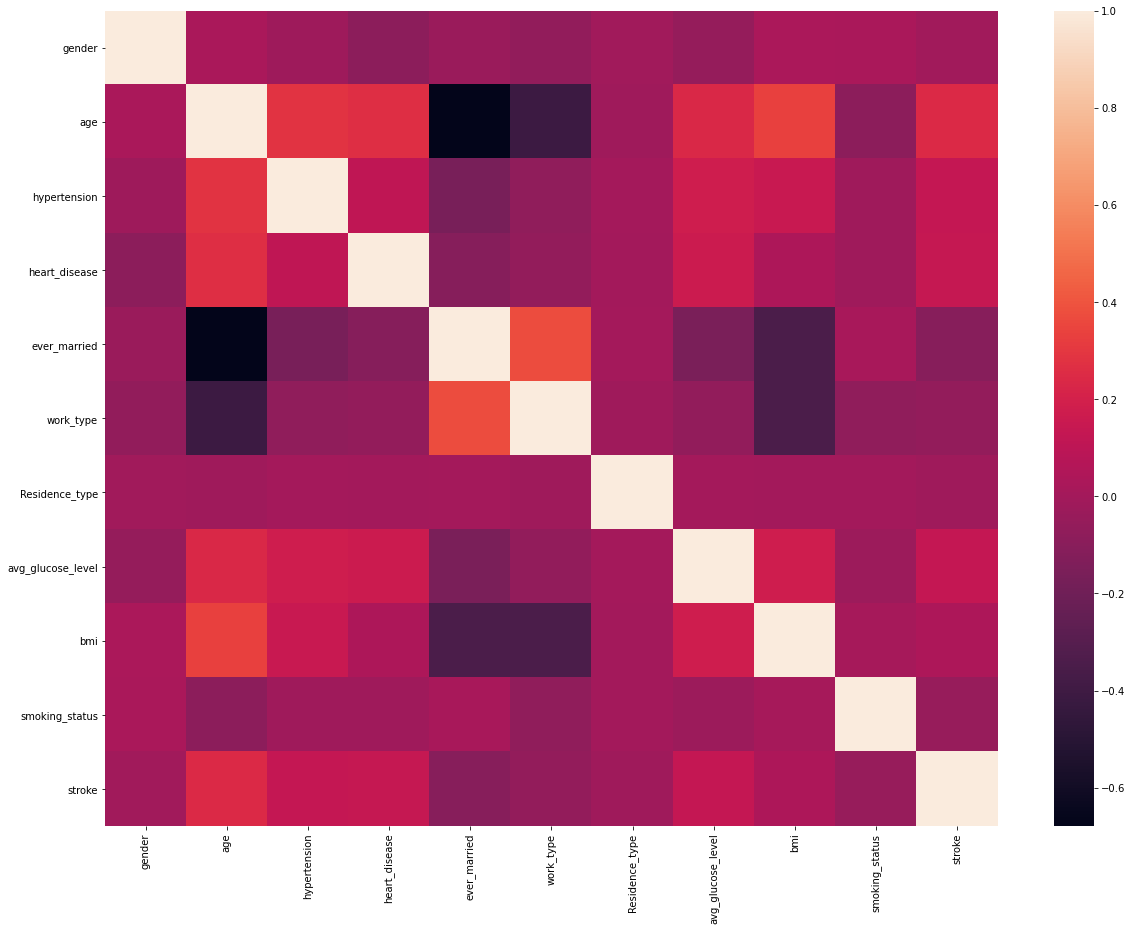

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr())
plt.show()

In [47]:
print(df.corr()['stroke'].sort_values())

ever_married        -0.108335
work_type           -0.058371
smoking_status      -0.044192
Residence_type      -0.015373
gender              -0.009243
bmi                  0.041128
hypertension         0.128648
avg_glucose_level    0.132028
heart_disease        0.134877
age                  0.245211
stroke               1.000000
Name: stroke, dtype: float64


In [48]:
#drop columns with -0.02<correlation<0.02¶
cols_to_drop=['Residence_type','gender']
df = df.drop(cols_to_drop, axis = 1).copy()
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
age,67.00,61.000000,80.00,49.00,79.00,81.00,74.00,69.00,59.000000,78.00
hypertension,0.00,0.000000,0.00,0.00,1.00,0.00,1.00,0.00,0.000000,0.00
heart_disease,1.00,0.000000,1.00,0.00,0.00,0.00,1.00,0.00,0.000000,0.00
ever_married,0.00,0.000000,0.00,0.00,0.00,0.00,0.00,1.00,0.000000,0.00
work_type,0.00,1.000000,0.00,0.00,1.00,0.00,0.00,0.00,0.000000,0.00
avg_glucose_level,228.69,202.210000,105.92,171.23,174.12,186.21,70.09,94.39,76.150000,58.57
bmi,36.60,28.893237,32.50,34.40,24.00,29.00,27.40,22.80,28.893237,24.20
smoking_status,0.00,1.000000,1.00,2.00,1.00,0.00,1.00,1.00,1.000000,1.00
stroke,1.00,1.000000,1.00,1.00,1.00,1.00,1.00,1.00,1.000000,1.00


# IRUS

In [49]:
# class count
class_count_0, class_count_1 = df['stroke'].value_counts()
# Separate class
class_0 = df[df['stroke'] == 0]
class_1 = df[df['stroke'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4857, 9)
class 1: (249, 9)


In [50]:
import math
from sklearn.model_selection import train_test_split

'''Require: XNmin : Training set of minority patterns with
cardinality Nmin
XNmaj: Training set of majority patterns with cardinality Nmaj
S: Number of samples from XNmaj for each Model, SoNmin
Sets: Number of classifiers, Default:1:5  ceilðNmaj=SÞ
t: Test sample
Ensure: Confidence score of t, conf(t)
confðtÞ 1⁄4 0
for i1⁄41 to Sets do
X0
Nmaj ( Randomly pick S samples without replacement
from XNmaj
Ts ( X0
Nmaj [ XNmin
Train base classifier hi using Ts samples
D1⁄4Probability of positive class assigned by hi to the test
sample t
Dnorm1⁄4z-score normalization of D (Eq. (1))
confðtÞ 1⁄4 confðtÞþDnorm
end for
confðtÞ 1⁄4 confðtÞ=Sets'''
# Test Data Selection
class_0_test=class_0.sample(n=297,replace=False)
class_0=pd.concat([class_0, class_0_test, class_0_test]).drop_duplicates(keep=False)
class_1_test=class_1.sample(n=49,replace=False)
class_1=pd.concat([class_1, class_1_test, class_1_test]).drop_duplicates(keep=False)
print(class_0_test.shape)
print(class_1_test.shape)
print(class_0.shape)
print(class_1.shape)

(297, 9)
(49, 9)
(4560, 9)
(200, 9)


In [51]:
Test_data=pd.concat([class_0_test,class_1_test])
y_test=np.asarray(Test_data[['stroke']])
X_test=np.asarray(Test_data.drop(['stroke'], axis = 1))

In [52]:

XNmaj=class_0.copy()
XNmin=class_1.copy()
S=190
Sets=24
print(Sets)
print(XNmaj.shape)

24
(4560, 9)


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [68]:
def irus( ml_model):  
    S=190
    Sets=24
    
    XNmaj=class_0.copy()
    XNmin=class_1.copy()
    confidence=np.zeros(346)
    prob=np.zeros(346)
    for i in range(Sets):
        
        X_train=XNmaj.sample(S,replace=True)
        XNmaj=pd.concat([XNmaj, X_train, X_train]).drop_duplicates(keep=False)
        X_train=pd.concat([X_train,XNmin])
        y_train=np.asarray(X_train[['stroke']])
        X_train=np.asarray(X_train.drop(['stroke'], axis = 1))
        ml_model.fit(X_train,y_train)
        y_pred=ml_model.predict_proba(X_test)
        D=np.zeros(346)
        for val in range(346):
            D[val]=y_pred[val][1]
        Dnorm=np.zeros(346)
        for j in range(346):
            Dnorm[j]=(D[j]-np.mean(D))/np.std(D)

        confidence=confidence+Dnorm
        prob=prob+D
    confidence=confidence/Sets
    prob=prob/Sets
    pred=np.zeros(346)
    for k in range(346):
        if(confidence[k]>0.5):
            pred[k]=1
        else:
            pred[k]=0
    from sklearn.metrics import confusion_matrix,accuracy_score
    cm_dtree=confusion_matrix(y_test,pred)
    ax = sns.heatmap(cm_dtree, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    accuracy_dtree=accuracy_score(y_test,pred)
    print("Accuracy: ",accuracy_dtree)
    from sklearn.metrics import classification_report
    print(classification_report(y_test,pred))

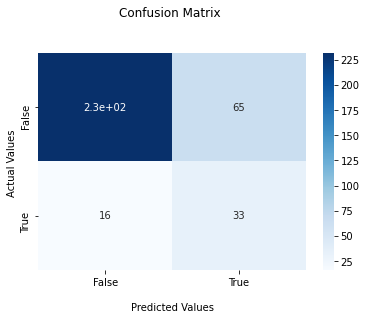

Accuracy:  0.7658959537572254
              precision    recall  f1-score   support

         0.0       0.94      0.78      0.85       297
         1.0       0.34      0.67      0.45        49

    accuracy                           0.77       346
   macro avg       0.64      0.73      0.65       346
weighted avg       0.85      0.77      0.79       346



<ipython-input-68-0c178441d99d>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ml_model.fit(X_train,y_train)
<ipython-input-68-0c178441d99d>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ml_model.fit(X_train,y_train)
<ipython-input-68-0c178441d99d>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ml_model.fit(X_train,y_train)
<ipython-input-68-0c178441d99d>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ml_model.fit(X_train,y_train)
<ipython-input-68-0c178441d99d>:16: DataConversionWarning: A column-vector y was passed when a 1d array was 

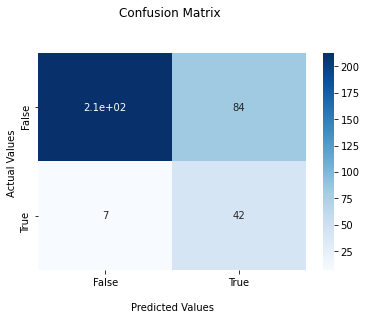

Accuracy:  0.7369942196531792
              precision    recall  f1-score   support

         0.0       0.97      0.72      0.82       297
         1.0       0.33      0.86      0.48        49

    accuracy                           0.74       346
   macro avg       0.65      0.79      0.65       346
weighted avg       0.88      0.74      0.78       346



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y 

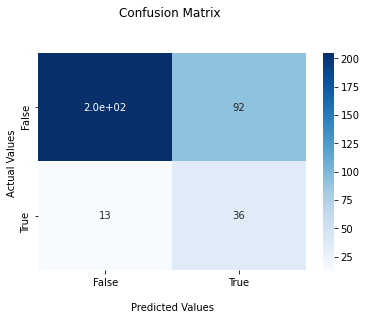

Accuracy:  0.6965317919075145
              precision    recall  f1-score   support

         0.0       0.94      0.69      0.80       297
         1.0       0.28      0.73      0.41        49

    accuracy                           0.70       346
   macro avg       0.61      0.71      0.60       346
weighted avg       0.85      0.70      0.74       346



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

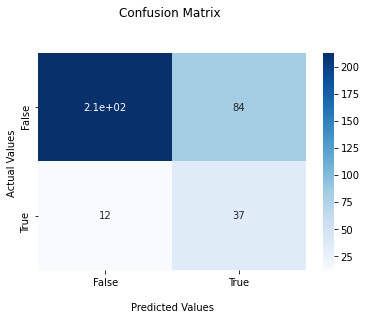

Accuracy:  0.7225433526011561
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82       297
         1.0       0.31      0.76      0.44        49

    accuracy                           0.72       346
   macro avg       0.63      0.74      0.63       346
weighted avg       0.86      0.72      0.76       346



In [70]:
for i in range(4):        
        if i%4==0:
            ml_model=DecisionTreeClassifier(criterion='gini', splitter='best')
            irus(ml_model)
        elif i%4==1:
            ml_model=RandomForestClassifier()
            irus(ml_model)
        elif i%4==2:
            ml_model=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
            irus(ml_model)
        elif i%4==3:
            ml_model=LogisticRegression(solver='liblinear', random_state=0)
            irus(ml_model)

In [73]:

def without_irus(ml_model):
    y = np.asarray(df[['stroke']])
    b=(list(df))
    x = np.asarray(df[b[:-1]])
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
    dtree=ml_model
    dtree.fit(X_train,y_train)
    y_pred=dtree.predict(X_test)
    y_trainpred=dtree.predict(X_train)
    cm_dtree=confusion_matrix(y_test,y_pred)

    ax = sns.heatmap(cm_dtree, annot=True, cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    accuracy_dtree=accuracy_score(y_test,y_pred)
    print("Accuracy: ",accuracy_dtree)
    print(classification_report(y_test,y_pred))

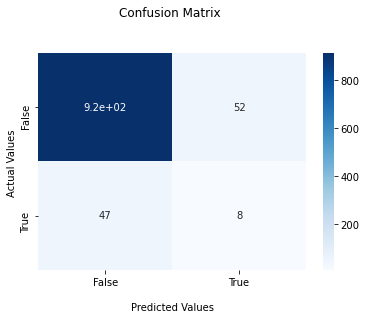

Accuracy:  0.9031311154598826
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       967
         1.0       0.13      0.15      0.14        55

    accuracy                           0.90      1022
   macro avg       0.54      0.55      0.54      1022
weighted avg       0.91      0.90      0.91      1022



<ipython-input-73-f1c91d6695a6>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtree.fit(X_train,y_train)


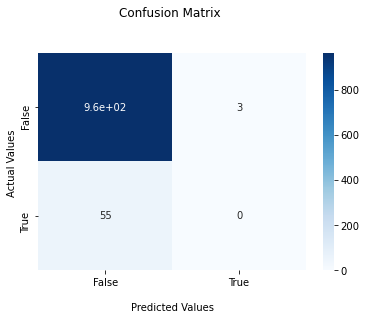

Accuracy:  0.9432485322896281
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       967
         1.0       0.00      0.00      0.00        55

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.94      0.92      1022



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


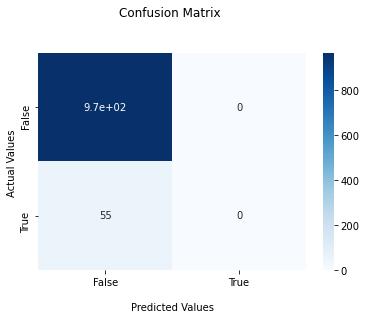

Accuracy:  0.9461839530332681
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       967
         1.0       0.00      0.00      0.00        55

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

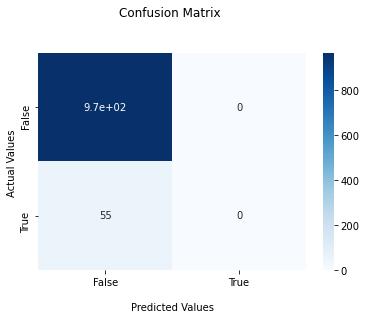

Accuracy:  0.9461839530332681
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       967
         1.0       0.00      0.00      0.00        55

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
for i in range(4):        
        if i%4==0:
            ml_model=DecisionTreeClassifier(criterion='gini', splitter='best')
            without_irus(ml_model)
        elif i%4==1:
            ml_model=RandomForestClassifier()
            without_irus(ml_model)
        elif i%4==2:
            ml_model=MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)
            without_irus(ml_model)
        elif i%4==3:
            ml_model=LogisticRegression(solver='liblinear', random_state=0)
            without_irus(ml_model)